### Steps
#### 1- Import necessary libraries
#### 2- Read the dataset using Pandas
#### 3- Explore the dataset properties
#### 4- Visualize the relationship between different variables and draw insights

In [1]:
#To read the dataset
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt

In [3]:
#Read the dataset
uber_df= pd.read_csv("uber-raw-data-sep14.csv")

#Display the first 5 records
uber_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [5]:
#Find the shape of the dataset
uber_df.shape

(1028136, 4)

In [6]:
#Understand the dataset properties
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [7]:
#Change the "Date/Time" column's data type from string to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [8]:
# Select relevant columns for clustering
coordinates_df = uber_df[['Lat', 'Lon']]


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates_df)


#### Group similar trip locations together, which can help identify areas with similar ride demand patterns (using K-means clustering)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_k

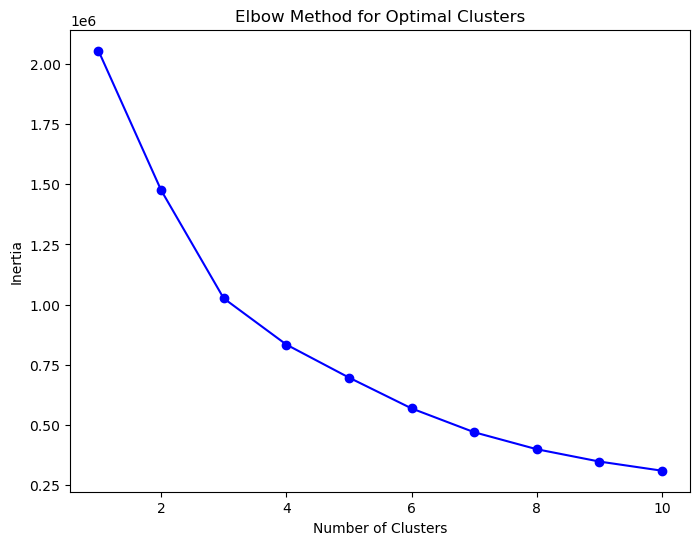

In [10]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_coordinates)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [17]:
# Perform K-means clustering with the optimal number of clusters
k = 4  # Referring to the Elbow Method above, 4 seems the "best" number
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_coordinates)

# Add cluster labels to the DataFrame
uber_df['Cluster'] = cluster_labels


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


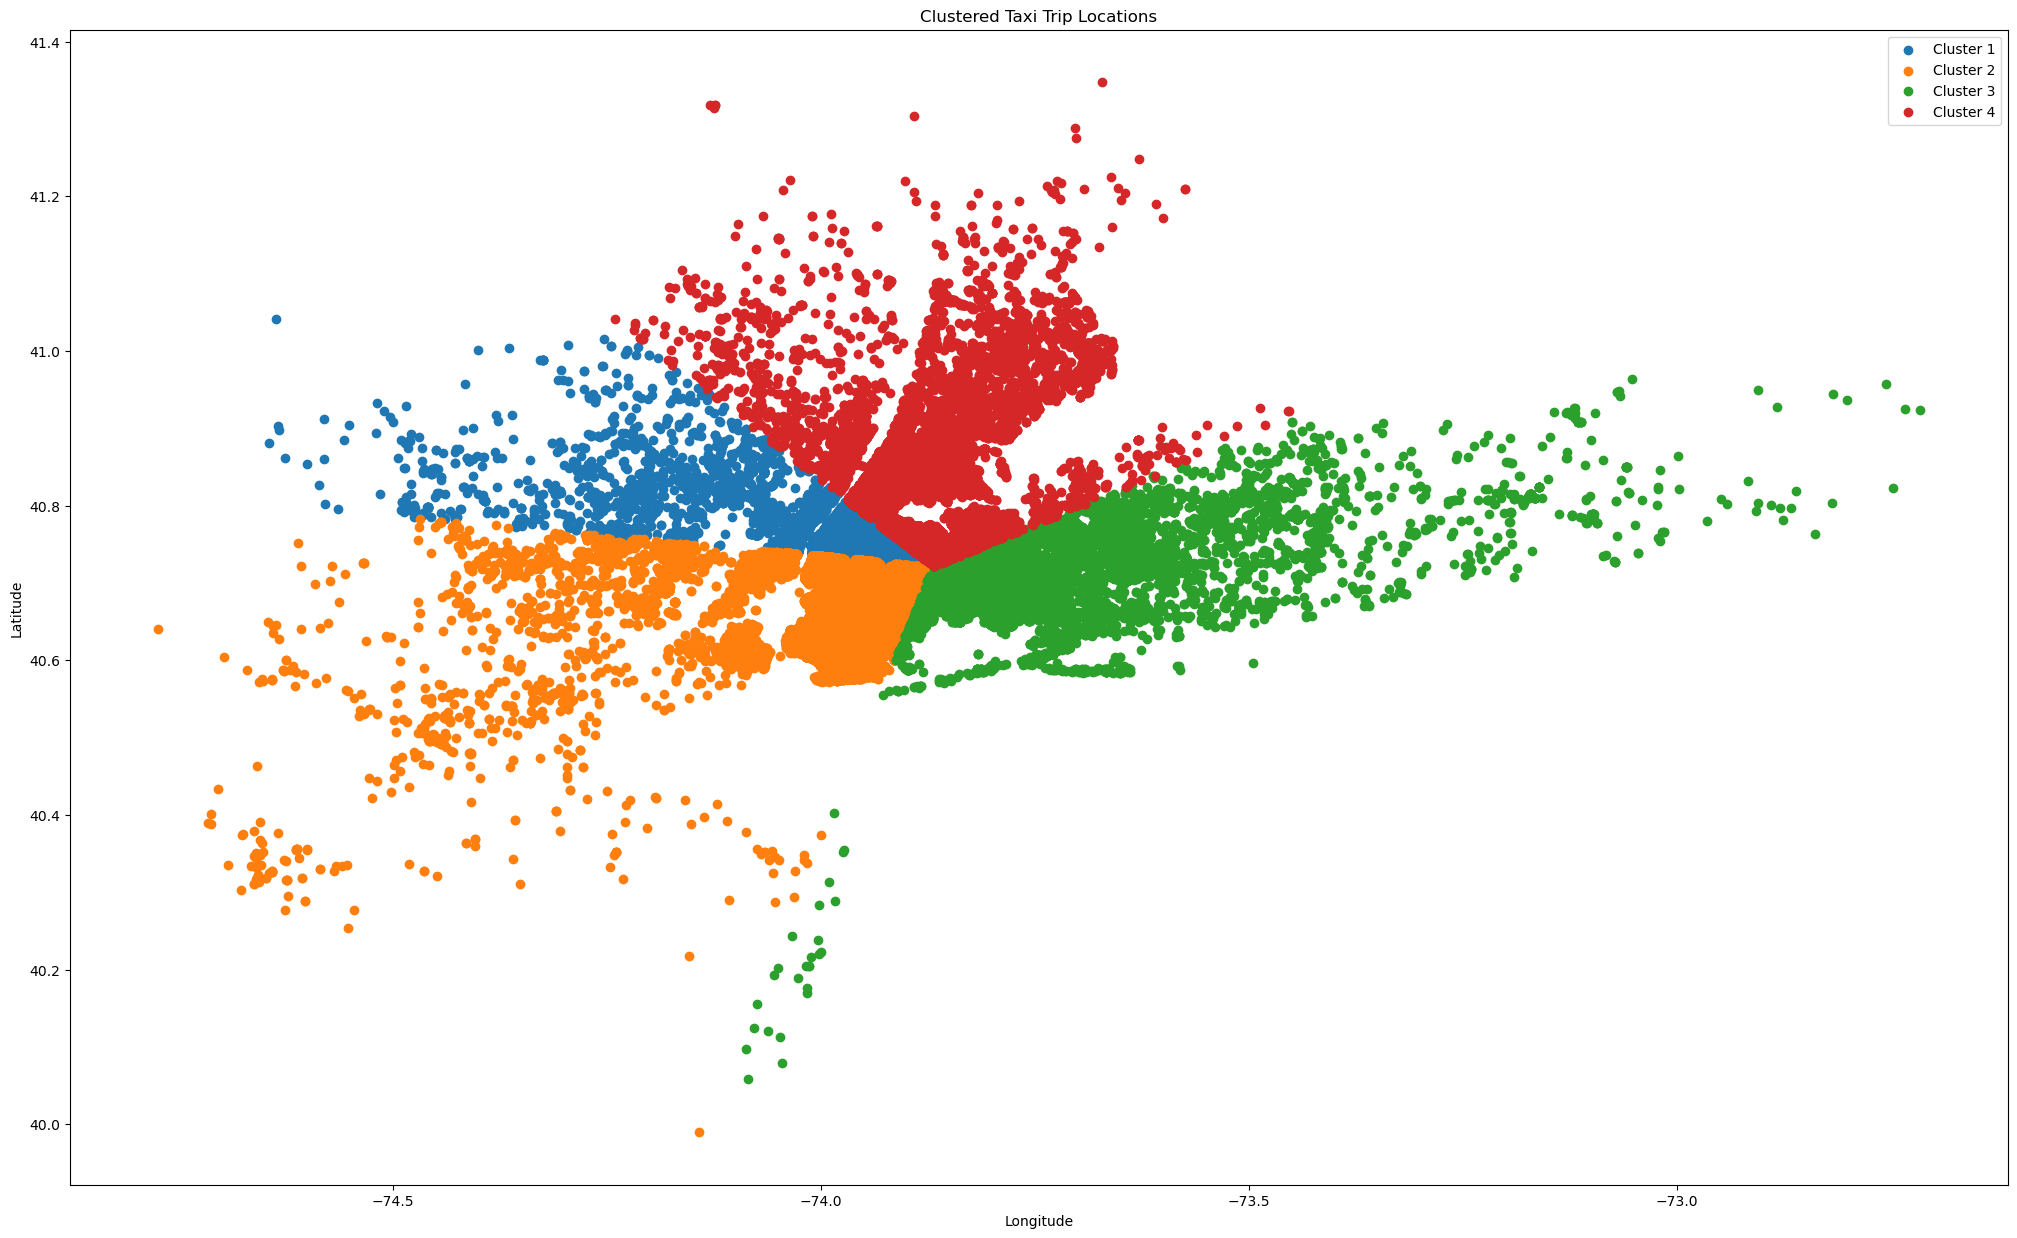

In [33]:
# Create scatter plot for each cluster
plt.figure(figsize=(25, 15))
for cluster in range(k):
    cluster_data = uber_df[uber_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Lon'], cluster_data['Lat'], label=f'Cluster {cluster + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Taxi Trip Locations')

plt.legend()
plt.show()


#### Uber ride counts by both the day of the week and the hour of the day

In [22]:
by_hour_week = uber_df.groupby(['Weekday','Hour']).apply(lambda x: len(x))

by_hour_weeek = by_hour_week.unstack()



by_hour_weeek

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


#### Let's compare ride counts on different weekdays to see if there are any significant differences. In this example, weekdays (Monday to Friday) to weekends (Saturday and Sunday) to understand variations in demand.

In [23]:
# Calculate the average ride counts for weekdays (Monday to Friday)
weekday_avg = by_hour_weeek.loc[0:4].mean()

# Calculate the average ride counts for weekends (Saturday and Sunday)
weekend_avg = by_hour_weeek.loc[5:6].mean()


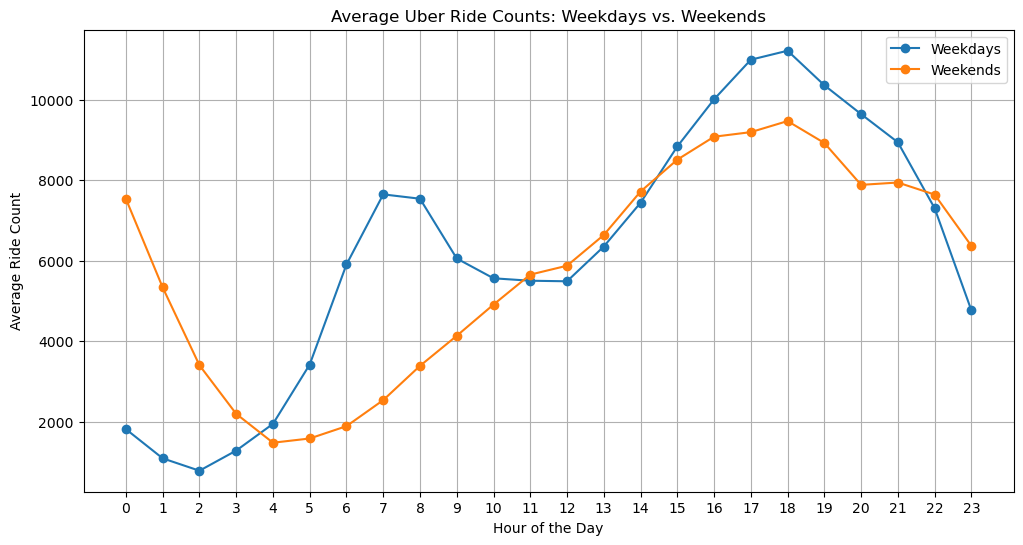

In [24]:
# Create a bar chart to compare ride counts
plt.figure(figsize=(12, 6))
plt.plot(weekday_avg.index, weekday_avg.values, label='Weekdays', marker='o')
plt.plot(weekend_avg.index, weekend_avg.values, label='Weekends', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Ride Count')
plt.title('Average Uber Ride Counts: Weekdays vs. Weekends')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


### Analysis of Location data points


(40.7, 41.0)

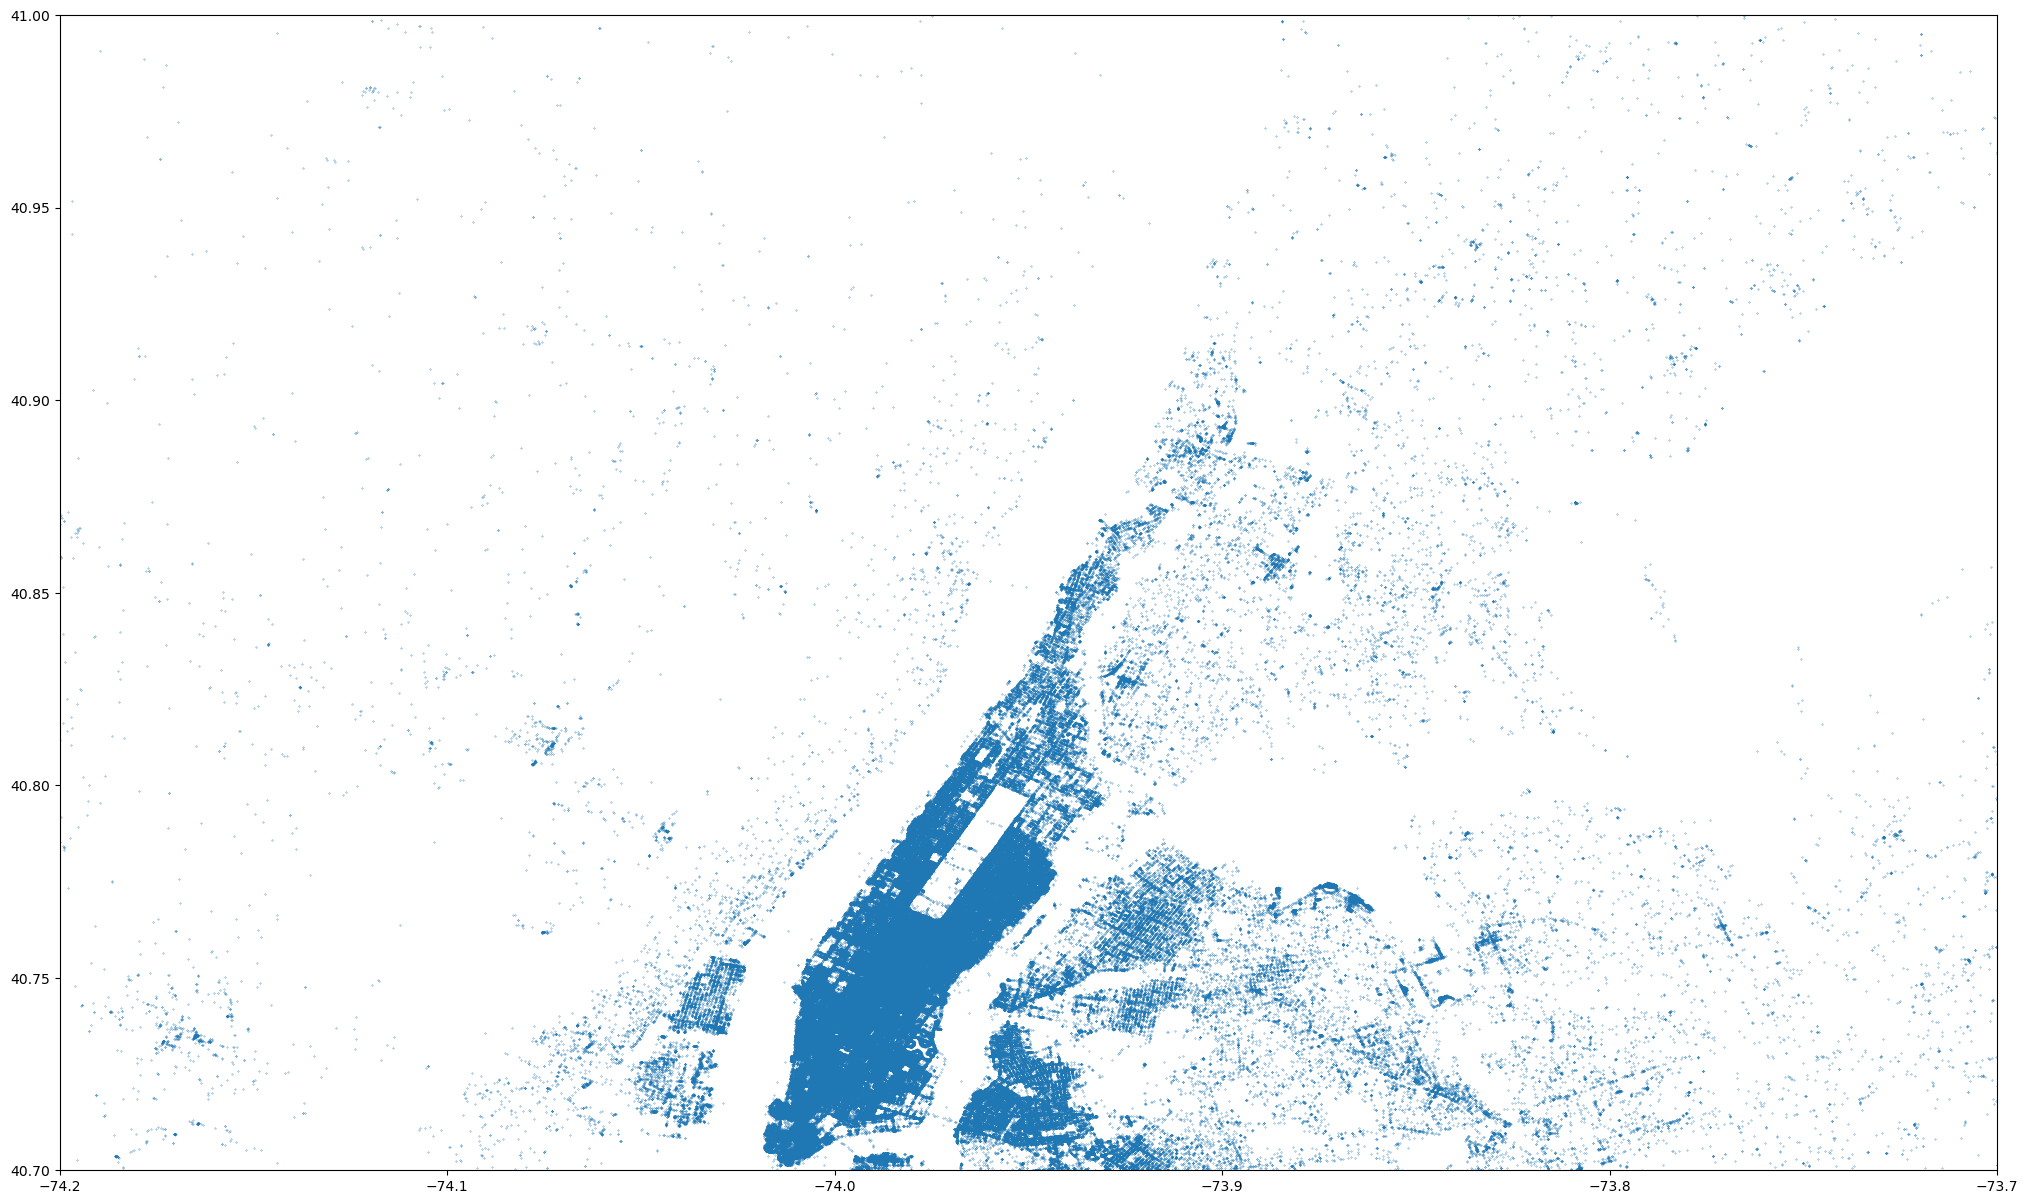

In [34]:
%matplotlib inline

plt.figure(figsize=(25,15))


plot(uber_df['Lon'], uber_df['Lat'], '.', ms=0.5)
xlim(-74.2, -73.7)
ylim(40.7,41)

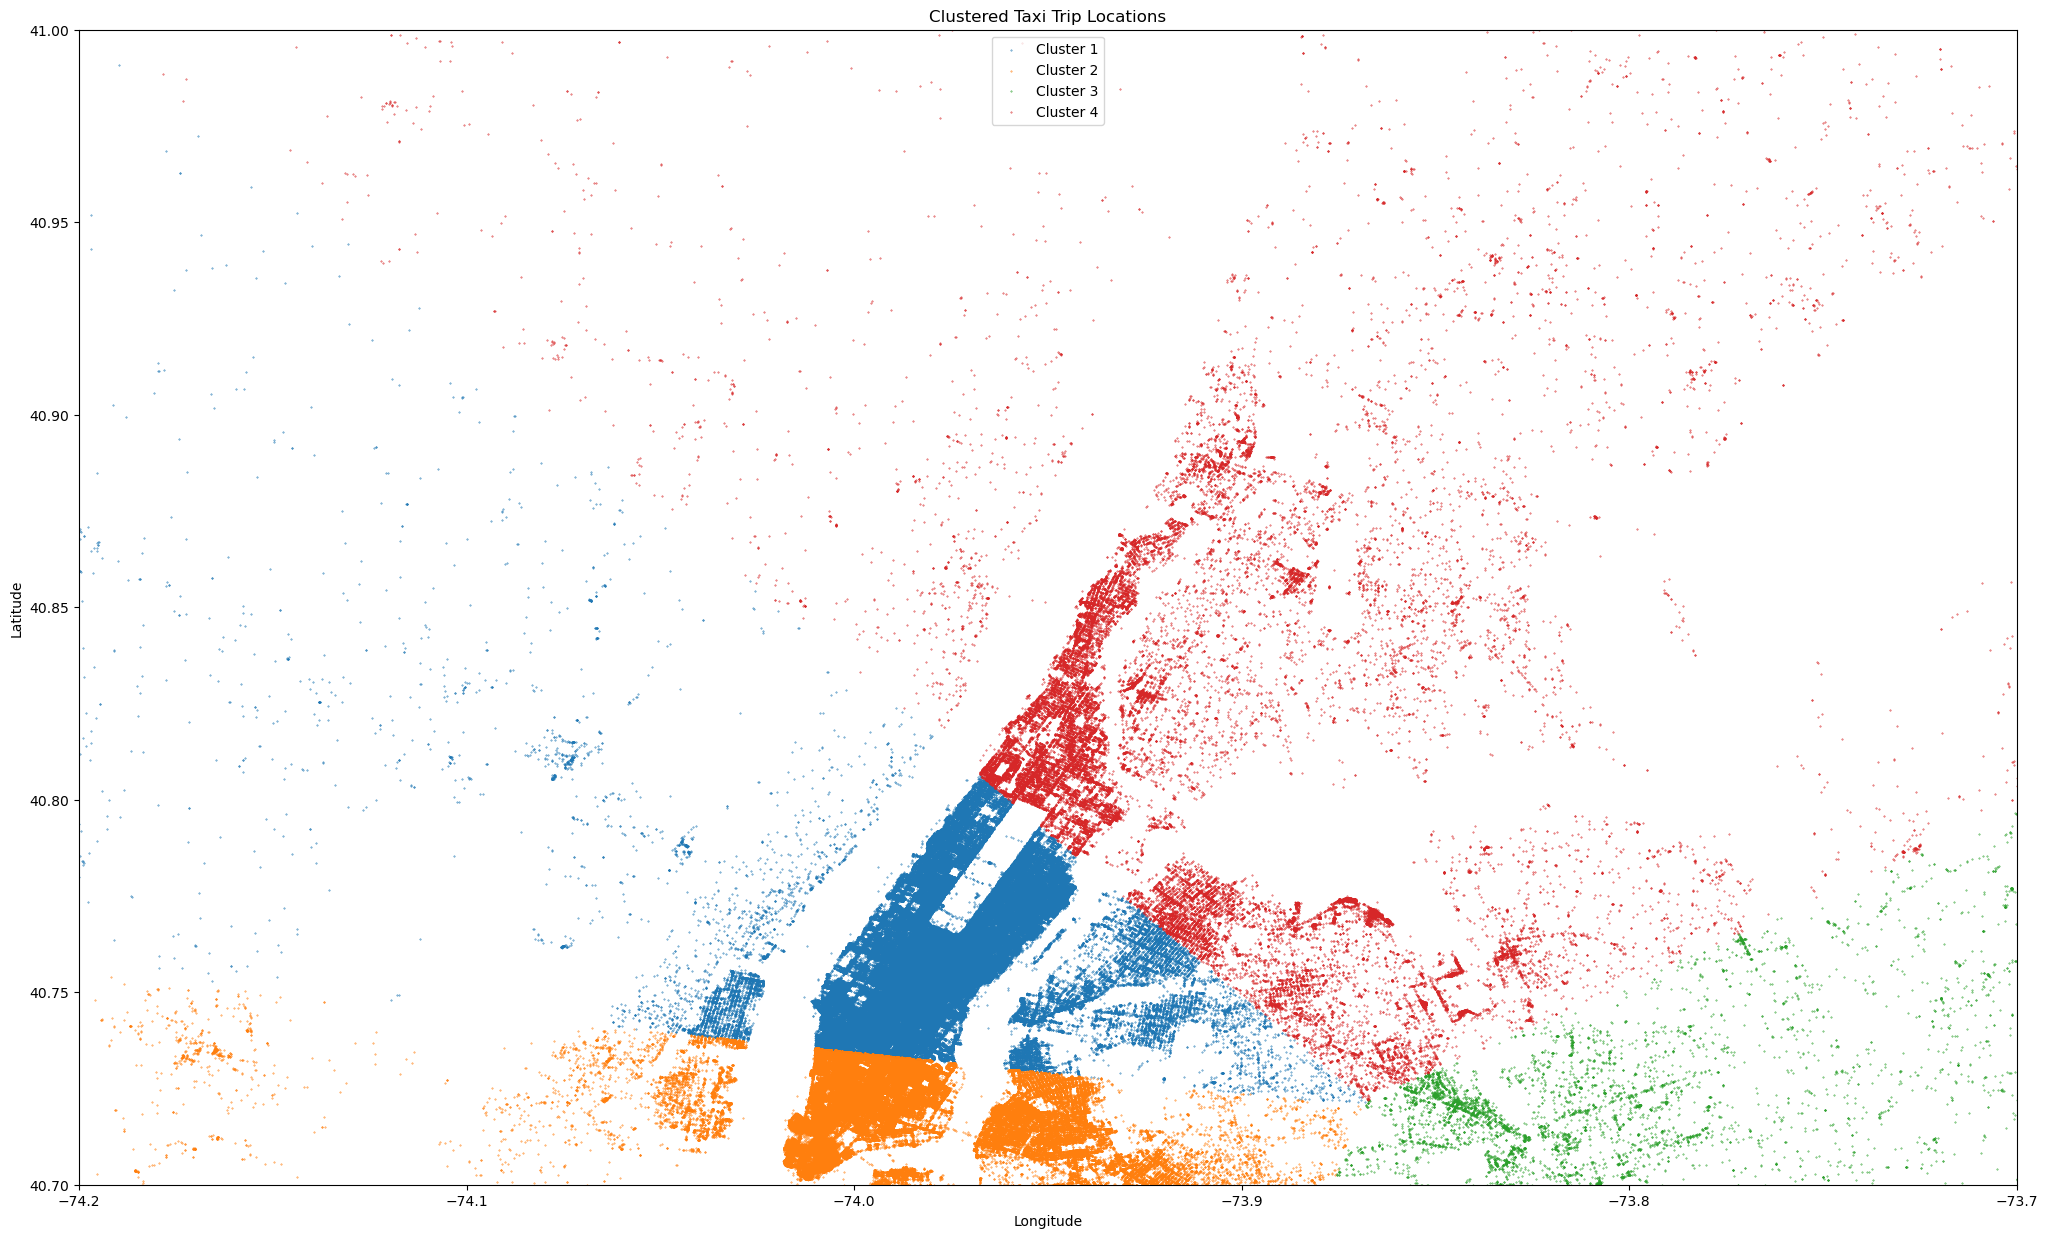

In [35]:

# Create scatter plot for each cluster with the same marker style and size
plt.figure(figsize=(25, 15))
for cluster in range(k):
    cluster_data = uber_df[uber_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Lon'], cluster_data['Lat'], label=f'Cluster {cluster + 1}', marker='.', s=0.5)

# Set the same x-axis and y-axis limits as in the first plot
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Taxi Trip Locations')

plt.legend()
plt.show()
